<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img , img_to_array 
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
from google.colab import drive
from keras.models import load_model

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


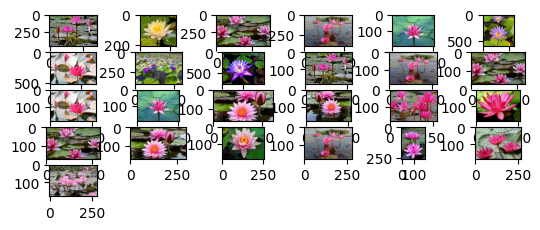

In [35]:
folder= '/content/drive/MyDrive/AnhAI/hoa/'
for i in range(25):
  plt.subplot(10,6,i+1)
  file_name=folder+'sung'+ str(i) +'.jpg'
  img=imread(file_name)
  plt.imshow(img)
plt.show()

In [29]:
photos, labels = list(), list()

for file in listdir(folder):
  if file.startswith('cuc'):
    output = 0
    photo = load_img(folder+file, target_size=(200, 200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hong'):
    output = 1
    photo = load_img(folder+file, target_size=(200, 200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('mai'):
    output = 2
    photo = load_img(folder+file, target_size=(200, 200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('sen'):
    output = 3
    photo = load_img(folder+file, target_size=(200, 200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('sung'):
    output = 4
    photo = load_img(folder+file, target_size=(200, 200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

classes = ["cuc", "hong", "mai", "sen", "sung"]
photos = asarray(photos)
labels = asarray(labels)

print(photos.shape, labels.shape)

save('HOA_photos.npy', photos)
save('HOA_labels.npy', labels)


(149, 200, 200, 3) (149,)


In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

history = model.fit(photos, labels, epochs=20,  batch_size=512, verbose=1)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 273.5405 - accuracy: 0.1812
Epoch 2/20
1/1 [==============================] - 0s 446ms/step - loss: 9459.7725 - accuracy: 0.2013
Epoch 3/20
1/1 [==============================] - 0s 360ms/step - loss: 16026.4697 - accuracy: 0.2081
Epoch 4/20
1/1 [==============================] - 0s 362ms/step - loss: 12070.4561 - accuracy: 0.1946
Epoch 5/20
1/1 [==============================] - 0s 362ms/step - loss: 10197.4395 - accuracy: 0.2081
Epoch 6/20
1/1 [==============================] - 0s 361ms/step - loss: 4500.3267 - accuracy: 0.2081
Epoch 7/20
1/1 [==============================] - 0s 362ms/step - loss: 1610.6926 - accuracy: 0.3221
Epoch 8/20
1/1 [==============================] - 0s 363ms/step - loss: 958.5753 - accuracy: 0.2081
Epoch 9/20
1/1 [==============================] - 0s 359ms/step - loss: 368.2141 - accuracy: 0.2819
Epoch 10/20
1/1 [==============================] - 0s 361ms/step - loss: 207.7322 - accuracy: 

In [33]:
model.evaluate(photos,labels)

5/5 [==============================] - 0s 44ms/step - loss: 0.4625 - accuracy: 0.9060


[0.4625021815299988, 0.9060402512550354]

1/1 [==============================] - 0s 159ms/step
[[0.10303503 0.0981883  0.10398428 0.10714081 0.1082866  0.10158191
  0.09317663 0.09055565 0.09431398 0.09973682]]


'sung'

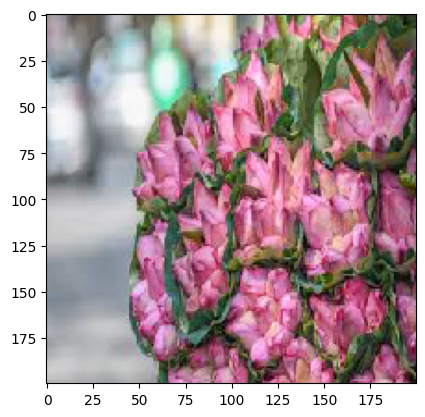

In [34]:

img = load_img('/content/drive/MyDrive/AnhAI/hoa/sen30.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]


1/1 [==============================] - 0s 26ms/step
[[0.10602538 0.10812476 0.1037294  0.10657223 0.10824967 0.10279059
  0.08621822 0.08745088 0.09435084 0.09648801]]


'sung'

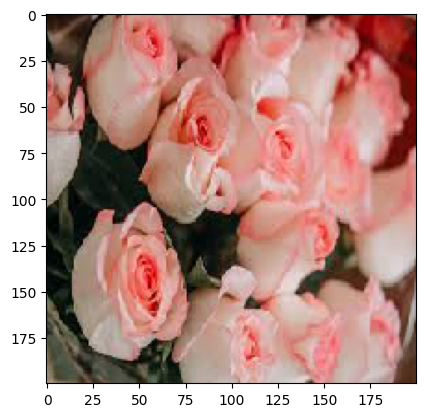

In [37]:

img = load_img('/content/drive/MyDrive/AnhAI/hoa/hong30.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]


1/1 [==============================] - 0s 26ms/step
[[0.10464255 0.09651709 0.11279216 0.10740063 0.11083415 0.09920812
  0.08751933 0.08842199 0.09322409 0.09943987]]


'mai'

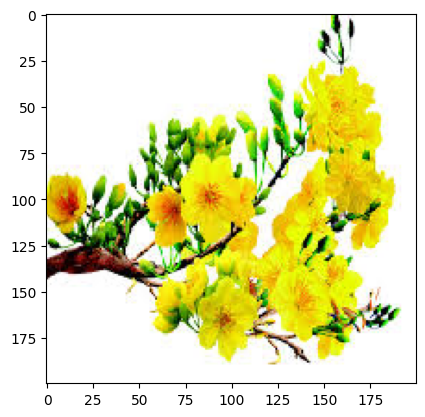

In [38]:

img = load_img('/content/drive/MyDrive/AnhAI/hoa/mai30.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]
